# Activity: Discover what is in your dataset

## Introduction

In this activity, you will discover characteristics of a dataset and use visualizations to analyze the data. This will develop and strengthen your skills in **exploratory data analysis (EDA)** and your knowledge of functions that allow you to explore and visualize data. 

EDA is an essential process in a data science workflow. As a data professional, you will need to conduct this process to better understand the data at hand and determine how it can be used to solve the problem you want to address. This activity will give you an opportunity to practice that process and prepare you for EDA in future projects.

In this activity, you are a member of an analytics team that provides insights to an investing firm. To help them decide which companies to invest in next, the firm wants insights into **unicorn companies**–companies that are valued at over one billion dollars. The data you will use for this task provides information on over 1,000 unicorn companies, including their industry, country, year founded, and select investors. You will use this information to gain insights into how and when companies reach this prestigious milestone and to make recommentations for next steps to the investing firm.

## Step 1: Imports

### Import libraries and packages 

First, import relevant Python libraries and modules. Use the `pandas` library and the `matplotlib.pyplot` module.

In [1]:
# Import libraries and packages

# Import packages
from google.cloud import storage

import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
from io import StringIO
from io import BytesIO
import json
import pickle
import six
import charset_normalizer
from wordcloud import WordCloud 
from typing import List


sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

### Load the dataset into a DataFrame

The dataset provided is in the form of a csv file named `Unicorn_Companies.csv` and contains a subset of data on unicorn companies. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
#storage_client =  storage.Client.from_service_account_json('../heidless-jupyter-0-d2008100d98c.json')
storage_client =  storage.Client()

BUCKET_NAME = 'heidless-jupyter-bucket-0'

bucket = storage_client.get_bucket(BUCKET_NAME)

AllCSV = []
my_prefix = 'unicorn-companies/'
my_file = 'Unicorn_Companies.csv'
full_file = my_prefix + my_file
#print(f'full_file: {full_file}')

file_names = list(bucket.list_blobs(prefix=my_prefix))
for file in file_names:
    if(file.name != my_prefix):
        if file.name == full_file:
            AllCSV.append(file.name)
#            print(file.name)
AllCSV



### YOUR CODE HERE ###
#companies = pd.read_csv("Unicorn_Companies.csv")

['unicorn-companies/Unicorn_Companies.csv']

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about [loading data](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/supplement/MdTG2/reference-guide-import-datasets-using-python) in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `pandas` library that allows you to read data from a csv file and load the data into a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `read_csv()` function from the `pandas` library. 

</details>

## Step 2: Data exploration

### Display the first 10 rows of the data

Next, explore the dataset and answer questions to guide your exploration and analysis of the data. To begin, display the first 10 rows of the data to get an understanding of how the dataset is structured.

In [3]:
# Display the first 10 rows of the data
all_dataframes = []

for csv in AllCSV:
    blob = bucket.get_blob(csv)
    if blob is not None and blob.exists(storage_client):
        bt = blob.download_as_string()
        s = str(bt, 'ISO-8859-1')
        s = StringIO(s)
        df = pd.read_csv(s, encoding='ISO-8859-1', low_memory=False)

        #df['country'] = csv[0:2] # adding column 'country' so that each dataset could be identified uniquely
        all_dataframes.append(df)
        print(csv)
    
#all_dataframes[0].head() # index 0 to 9 for [CA, DE, FR, GB, IN, JP, KR, MX, RU, US] datasets

companies = all_dataframes[0]
companies.head()

unicorn-companies/Unicorn_Companies.csv


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about exploratory data analysis in Python](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight/lecture/kfl9b/find-stories-using-the-six-exploratory-data-analysis-practices).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `head()` function from the `pandas` library. 

</details>

**Question:** What do you think the "Date Joined" column represents?

 [Write your response here. Double-click (or enter) to edit.]

**Question:** What do you think the "Select Investors" column represents?

[Write your response here. Double-click (or enter) to edit.]

### Assess the size of the dataset

Get a sense of how large the dataset is. The `size` property that DataFrames have can help.

In [4]:
# How large the dataset is

companies.size

10740

**Question:** What do you notice about the size of the dataset?

[Write your response here. Double-click (or enter) to edit.]

### Determine the shape of the dataset

Identify the number of rows and columns in the dataset. The `shape` property that DataFrames have can help.

In [5]:
# Shape of the dataset

companies.shape

(1074, 10)

**Question:** What do you notice about the shape of the dataset?

[Write your response here. Double-click (or enter) to edit.]

### Get basic information about the dataset

To further understand what the dataset entails, get basic information about the dataset, including the data type of values in each column. There is more than one way to approach this task. In this instance, use the `info()` function from `pandas`.

In [6]:
# Get information

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


**Question:** What do you notice about the type of data in the `Year Founded` column? Refer to the output from using `info()` above. Knowing the data type of this variable is helpful because it indicates what types of analysis can be done with that variable, how it can be aggregated with other variables, and so on.

[Write your response here. Double-click (or enter) to edit.]

**Question:** What do you notice about the type of data in the `Date Joined` column? Refer to the output from using `info()` above. Knowing the data type of this variable is helpful because it indicates what types of analysis can be done with that variable and how the variable can be transformed to suit specific tasks.

[Write your response here. Double-click (or enter) to edit.]

## Step 3: Statistical tests

### Find descriptive statistics

Find descriptive statistics and structure your dataset. The `describe()` function from the `pandas` library can help. This function generates statistics for the numeric columns in a dataset. 

In [7]:
# Get descriptive statistics

companies.describe()


,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


**Question:** Based on the table of descriptive stats generated above, what do you notice about the minimum value in the `Year Founded` column? This is important to know because it helps you understand how early the entries in the data begin.

[Write your response here. Double-click (or enter) to edit.]

**Question:** What do you notice about the maximum value in the `Year Founded` column? This is important to know because it helps you understand the most recent year captured by the data. 

[Write your response here. Double-click (or enter) to edit.]

### Convert the `Date Joined` column to datetime

Use the `to_datetime()` function from the `pandas` library  to convert the `Date Joined` column to datetime. This splits each value into year, month, and date components. This is an important step in data cleaning, as it makes the data in this column easier to use in tasks you may encounter. To name a few examples, you may need to compare "date joined" between companies or determine how long it took a company to become a unicorn. Having "date joined" in datetime form would help you complete such tasks.

In [8]:
# Step 1: Use pd.to_datetime() to convert Date Joined column to datetime 
# Step 2: Update the column with the converted values

### YOUR CODE HERE ###
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])


/tmp/ipykernel_1/1584631019.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])


In [9]:
# Use .info() to confirm that the update actually took place

### YOUR CODE HERE ###
companies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


In [10]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


### Create a `Year Joined` column

It is common to encounter situations where you will need to compare the year joined with the year founded. The `Date Joined` column does not just have year—it has the year, month, and date. Extract the year component from the `Date Joined` column and add those year components into a new column to keep track of each company's year joined.

In [11]:
# Step 1: Use .dt.year to extract year component from Date Joined column
# Step 2: Add the result as a new column named Year Joined to the DataFrame

### YOUR CODE HERE ###
companies['Year Joined'] = companies['Date Joined'].dt.year


In [12]:
# Use .head() to confirm that the new column did get added

### YOUR CODE HERE ###
companies.head()


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


## Step 4: Results and evaluation


### Take a sample of the data

It is not necessary to take a sample of the data in order to conduct the visualizations and EDA that follow. But you may encounter scenarios in the future where you will need to take a sample of the data due to time and resource limitations. For the purpose of developing your skills around sampling, take a sample of the data and work with that sample for the next steps of analysis you want to conduct. Use the `sample()` function for this task.

- Use `sample()` with the `n` parameter set to `50` to randomly sample 50 unicorn companies from the data. Be sure to specify the `random_state` parameter to ensure reproducibility of your work. Save the result to a variable called `companies_sampled`.

In [13]:
# Sample the data

### YOUR CODE HERE ###
companies_sample = companies.sample(n = 50, random_state = 42)

In [14]:
companies_sample.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017


### Visualize the time it took companies to reach unicorn status

Visualize the longest time it took companies to reach unicorn status for each industry represented in the sample. To create a bar plot to visualize this, use the `bar()` function from the `matplotlib.pyplot` module. You'll first need to prepare the data.

In [15]:
# Prepare data for plotting

### YOUR CODE HERE ###
companies_sample["years_till_unicorn"] = companies_sample["Year Joined"] - companies_sample["Year Founded"]

# Group the data by `Industry`. For each industry, get the max value in the `years_till_unicorn` column.
grouped = (companies_sample[["Industry", "years_till_unicorn"]]
           .groupby("Industry")
           .max()
           .sort_values(by="years_till_unicorn")
          )
grouped

,years_till_unicorn
Industry,
Consumer & retail,1
Auto & transportation,2
Artificial intelligence,5
Data management & analytics,8
Mobile & telecommunications,9
"Supply chain, logistics, & delivery",12
Internet software & services,13
Other,15
E-commerce & direct-to-consumer,18


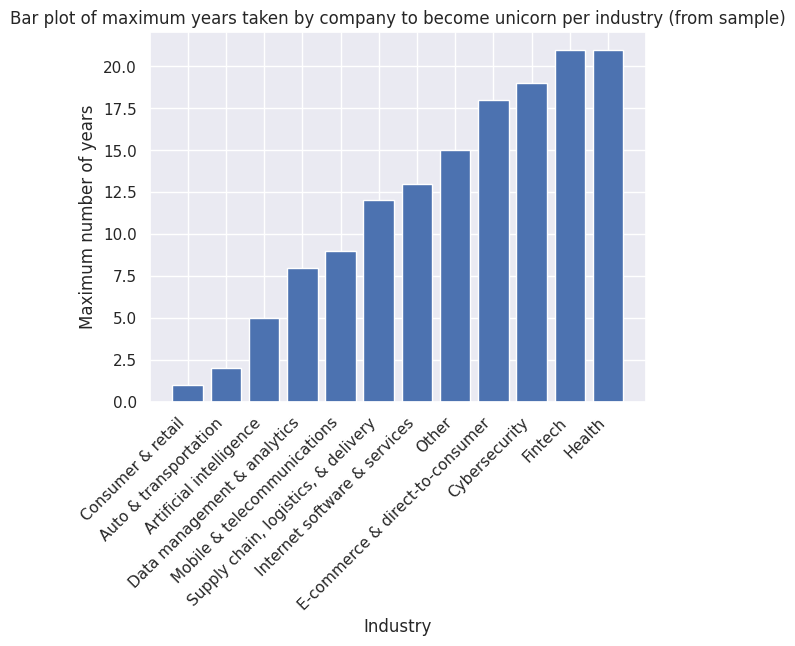

In [16]:
# Create bar plot
# with the various industries as the categories of the bars
# and the time it took to reach unicorn status as the height of the bars

### YOUR CODE HERE ###
plt.bar(grouped.index, grouped['years_till_unicorn'])

# Set title

### YOUR CODE HERE ###
plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")


# Set x-axis label

### YOUR CODE HERE ###
plt.xlabel("Industry")


# Set y-axis label

### YOUR CODE HERE ###
plt.ylabel("Maximum number of years")


# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text

### YOUR CODE HERE ###

plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot

### YOUR CODE HERE ###
plt.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

To prepare the data for modeling, begin by creating a column that represents the number of years it took each company to reach unicorn status. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>
    
To prepare the data for modeling, group the dataframe by industry and get the maximum value in the newly created column for each industry.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

You can use the `plt.bar()` to create the bar plot, passing in the categories and heights of the bars.

You can use `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` to set the title, x-axis label, and y-axis label, respectively. 

You can use `plt.xticks()` to rotate labels on the x-axis of a plot. The parameters `rotation=45, horizontalalignment='right'` can be passed in to rotate the labels by 45 degrees and align the labels to the right. 

You can use `plt.show()` to display a plot.

</details>

**Question:** What do you observe from this bar plot?

[Write your response here. Double-click (or enter) to edit.]

### Visualize the maximum unicorn company valuation per industry

Visualize unicorn companies' maximum valuation for each industry represented in the sample. To create a bar plot to visualize this, use the `bar()` function from the `matplotlib.pyplot` module. Before plotting, create a new column that represents the companies' valuations as numbers (instead of strings, as they're currently represented). Then, use this new column to plot your data.

In [18]:
# Create a column representing company valuation as numeric data
companies_sample['valuation_billions'] = companies_sample['Valuation']
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('$', '')
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('B', '')
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].astype('int')
companies_sample.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,years_till_unicorn,valuation_billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5,3


In [19]:
grouped = (companies_sample[["Industry", "valuation_billions"]]
           .groupby("Industry")
           .max()
           .sort_values(by="valuation_billions")
          )
grouped

,valuation_billions
Industry,
Auto & transportation,1
Consumer & retail,1
Other,2
"Supply chain, logistics, & delivery",2
Cybersecurity,3
Health,3
Data management & analytics,4
E-commerce & direct-to-consumer,4
Internet software & services,5


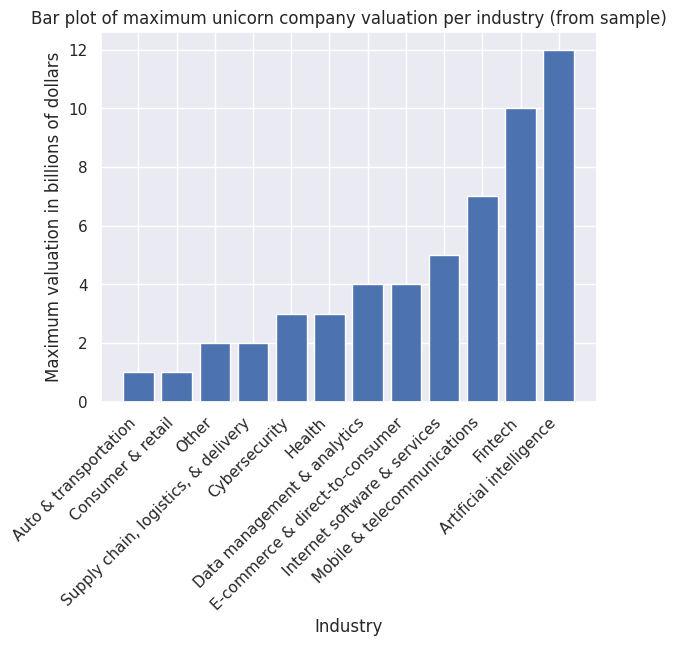

In [20]:
# Create bar plot
# with the various industries as the categories of the bars
# and the maximum valuation for each industry as the height of the bars

### YOUR CODE HERE ###
plt.bar(grouped.index, grouped['valuation_billions'])


# Set title

### YOUR CODE HERE ###

plt.title("Bar plot of maximum unicorn company valuation per industry (from sample)")

# Set x-axis label

### YOUR CODE HERE ###
plt.xlabel("Industry")


# Set y-axis label

### YOUR CODE HERE ###
plt.ylabel("Maximum valuation in billions of dollars")


# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text  

### YOUR CODE HERE ###
plt.xticks(rotation=45, horizontalalignment='right')


# Display the plot

### YOUR CODE HERE ###
plt.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Repeat the process from the last task, only this time with different variables.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `matplotlib.pyplot` module that allows you to create a bar plot, specifying the category and height for each bar. 

Use the functions in the `matplotlib.pyplot` module that allow you to set the title, x-axis label, and y-axis label of plots. In that module, there are also functions for rotating the labels on the x-axis and displaying the plot. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use the `plt.bar()` to create the bar plot, passing in the categories and heights of the bars.

Use `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` to set the title, x-axis label, and y-axis label, respectively. 

Use `plt.xticks()` to rotate labels on the x-axis of a plot. The parameters `rotation=45, horizontalalignment='right'` can be passed in to rotate the labels by 45 degrees and align the labels to the right. 

Use `plt.show()` to display a plot.

</details>

**Question:** What do you observe from this bar plot? 

[Write your response here. Double-click (or enter) to edit.]

## Considerations

**What are some key takeaways that you learned from this lab?**

[Write your response here. Double-click (or enter) to edit.]

**What findings would you share with others?**

[Write your response here. Double-click (or enter) to edit.]

**What recommendations would you share with stakeholders based on these findings?**

[Write your response here. Double-click (or enter) to edit.]

**References**

Bhat, M.A. (2022, March). [*Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies). 



**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.